<a href="https://colab.research.google.com/github/Niveditha-J/Emoji-Generator/blob/main/emoji_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python mediapipe matplotlib tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 15.6 MB/s eta 0:00:00


In [2]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Ml projects/fer2013.csv')

# Preprocess the data
X = []
y = []

for index, row in data.iterrows():
    pixels = row['pixels'].split(' ')  # The pixels are stored as a string
    pixels = np.array(pixels, dtype='float32')
    pixels = pixels.reshape(48, 48, 1)  # Reshape to 48x48 image
    X.append(pixels)
    y.append(row['emotion'])

X = np.array(X)
y = np.array(y)

# Normalize pixel values
X = X / 255.0

# One-hot encode labels
y = to_categorical(y, num_classes=7)  # Assuming there are 7 emotion categories

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # Output layer for 7 emotions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Save the trained model
model.save('/content/fer2013_emotion_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 109s 119ms/step - accuracy: 0.3187 - loss: 1.6911 - val_accuracy: 0.4494 - val_loss: 1.4424
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 111ms/step - accuracy: 0.4710 - loss: 1.3846 - val_accuracy: 0.4834 - val_loss: 1.3480
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 146s 116ms/step - accuracy: 0.5243 - loss: 1.2621 - val_accuracy: 0.5086 - val_loss: 1.2842
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 137s 111ms/step - accuracy: 0.5679 - loss: 1.1485 - val_accuracy: 0.5235 - val_loss: 1.2593
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 107s 120ms/step - accuracy: 0.6006 - loss: 1.0637 - val_accuracy: 0.5393 - val_loss: 1.2613
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 133s 110ms/step - accuracy: 0.6446 - loss: 0.9571 - val_accuracy: 0.5357 - val_loss: 1.2524
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.6743 - loss: 0.8751 - val_accuracy: 0.5433 - val_loss: 1.2734
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 135s 110ms/step - accuracy: 0.7234 -

In [6]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/fer2013_emotion_model.h5')


In [19]:
import cv2
import numpy as np

# Load the image
image_path = '/content/drive/MyDrive/Ml projects/photo3.webp'  # Replace with the actual image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to 48x48
resized_image = cv2.resize(gray_image, (48, 48))

# Normalize the pixel values
normalized_image = resized_image / 255.0

# Reshape the image to match the input shape of the model
input_image = np.reshape(normalized_image, (1, 48, 48, 1))


In [20]:
# Predict emotion
prediction = model.predict(input_image)

# Get the emotion with the highest score
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Replace if different categories
predicted_emotion = emotion_classes[np.argmax(prediction)]

print(f"Predicted Emotion: {predicted_emotion}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Emotion: Fear


In [21]:
# Emoji mapping based on predicted emotion
emotion_to_emoji = {
    'Angry': '😡',
    'Disgust': '🤢',
    'Fear': '😨',
    'Happy': '😊',
    'Sad': '😢',
    'Surprise': '😮',
    'Neutral': '😐'
}

# Get the emoji
emoji = emotion_to_emoji.get(predicted_emotion, '🤔')
print(f"Generated Emoji: {emoji}")


Generated Emoji: 😨


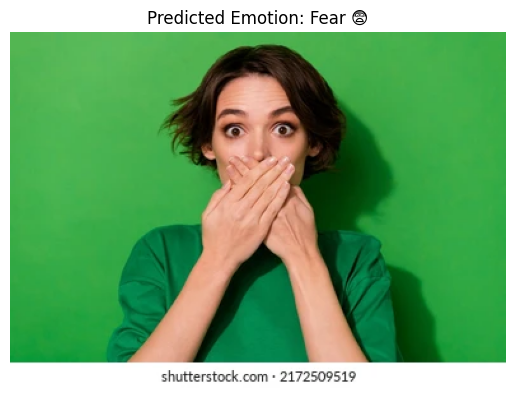

In [22]:
import matplotlib.pyplot as plt

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predicted Emotion: {predicted_emotion} {emoji}")
plt.show()
